# Importing the clean dataset
We use the data we cleaned under data-cleaning

In [46]:
import numpy as np
import pandas as pd

cleanData = pd.read_csv("dataset/steam_cleaned.csv")
cleanData

,appid,name,achievements,average_playtime,median_playtime,owners,price,categories_Multi-player,categories_Online Multi-Player,categories_Local Multi-Player,...,genres_Software Training,genres_Sexual Content,genres_Audio Production,genres_Game Development,genres_Photo Editing,genres_Accounting,genres_Documentary,genres_Tutorial,age,positive_ratio
0,10,Counter-Strike,0,17612,317,15000000,7.19,1,1,1,...,0,0,0,0,0,0,0,0,8461,0.973888
1,20,Team Fortress Classic,0,277,62,7500000,3.99,1,1,1,...,0,0,0,0,0,0,0,0,9041,0.839787
2,30,Day of Defeat,0,187,34,7500000,3.99,1,0,0,...,0,0,0,0,0,0,0,0,7550,0.895648
3,40,Deathmatch Classic,0,258,184,7500000,3.99,1,1,1,...,0,0,0,0,0,0,0,0,8249,0.826623
4,50,Half-Life: Opposing Force,0,624,415,7500000,3.99,1,0,0,...,0,0,0,0,0,0,0,0,8827,0.947996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15283,1057180,Border Officer,12,0,0,10000,7.19,0,0,0,...,0,0,0,0,0,0,0,0,1721,0.714286
15284,1057430,Geometry May. I swear it's a nice free game,7,0,0,10000,0.00,0,0,0,...,0,0,0,0,0,0,0,0,1721,0.846939
15285,1057690,Sin Slayers: The First Sin,0,0,0,35000,0.00,0,0,0,...,0,0,0,0,0,0,0,0,1726,0.776923
15286,1058430,A Legionary's Life,23,0,0,10000,6.10,0,0,0,...,0,0,0,0,0,0,0,0,1718,0.733333


# How do we know what games are popular?
According to this article : https://www.gamedeveloper.com/business/what-do-investors-look-for-in-a-game-developer- it states that play time is a big factor in determing how popular a game is.

Using this fact as a context, we can use playtime as a reponse variable in our dataset to be used as a way to tell how popular a game is.

We dropped median_playtime in favour of average_playtime as it has a higher distribution and the mean is more reflective of the total hours played compared with average_playtime.


# Analyzing average_playtime
We can see that the distribution of average_playtime is extremely skewed.

<Axes: title={'center': 'Natural log transformed Excluding 0'}, xlabel='average_playtime', ylabel='Density'>

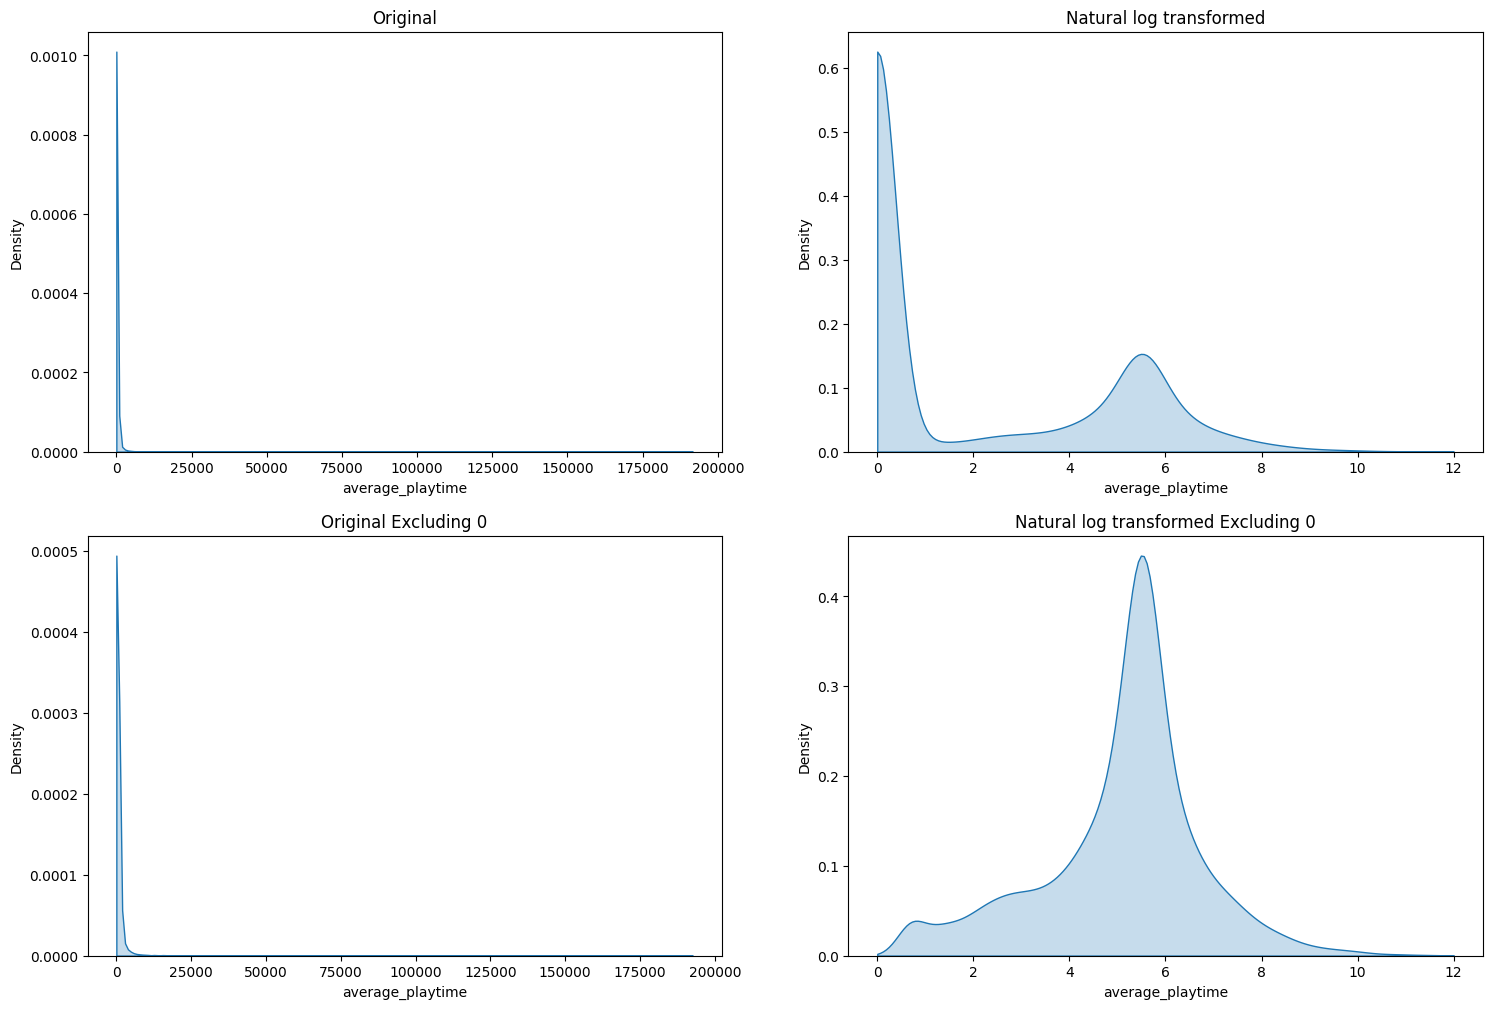

In [57]:
import seaborn as sb
dataDFno0 = cleanData[cleanData.average_playtime != 0]

fig, axes = plt.subplots(2,2, figsize=(18, 12))

axes[0][0].set_title('Original')
sb.kdeplot(ax=axes[0,0], data=cleanData.average_playtime, clip=(0.0, 999999), fill=True)

axes[0][1].set_title('Natural log transformed')
sb.kdeplot(ax=axes[0,1], data=np.log(cleanData.average_playtime+1), clip=(0.0, 12), fill=True)

axes[1][0].set_title('Original Excluding 0')
sb.kdeplot(ax=axes[1,0], data=dataDFno0.average_playtime, clip=(0.0, 999999), fill=True)

axes[1][1].set_title('Natural log transformed Excluding 0')
sb.kdeplot(ax=axes[1,1], data=np.log(dataDFno0.average_playtime+1), clip=(0.0, 12), fill=True)

In [60]:
# Logarithimic transformation
cleanData["average_playtime"] = np.log(cleanData.average_playtime+1)

In [61]:
cleanData["average_playtime"].describe()

count    15288.000000
mean         0.389300
std          0.497929
min          0.000000
25%          0.000000
50%          0.000000
75%          1.025794
max          1.274534
Name: average_playtime, dtype: float64

The graph and the .describe() function applied to average_playtime reveal a significant skew in the data, with a high concentration of 0s, as evidenced by the 0 at the 25th and 50th percentiles.

Consequently, we opted for a natural logarithmic transformation of the average_playtime to address the skewness. Removing the 0s may cause the skewdness to normalize but it is still a big part of the dataset. Hence we decided to not exclude the 0s otherwise it would have left us with a small dataset as seen on the top right graph.


# Removing unwanted datas and filtering by numerical data
Here, we dropped median_playtime as we are going to be using average_playtime as our response variable.

We also drop the unnecessary "appid" data as it serves no purpose and will only cause noise.

We also decided to apply the natural log for the owners data as the value is too big and may cause the data to have outliers due to how huge some of the values are.

In [62]:
data = cleanData.drop(columns=["median_playtime","appid"])
data = data.select_dtypes(include=np.number)
data["owners"] = np.log(data.owners+1)
data

,achievements,average_playtime,owners,price,categories_Multi-player,categories_Online Multi-Player,categories_Local Multi-Player,categories_Valve Anti-Cheat enabled,categories_Single-player,categories_Steam Cloud,...,genres_Software Training,genres_Sexual Content,genres_Audio Production,genres_Game Development,genres_Photo Editing,genres_Accounting,genres_Documentary,genres_Tutorial,age,positive_ratio
0,0,1.217094,16.523561,7.19,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,8461,0.973888
1,0,1.061688,15.830414,3.99,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,9041,0.839787
2,0,1.040422,15.830414,3.99,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,7550,0.895648
3,0,1.057966,15.830414,3.99,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,8249,0.826623
4,0,1.100799,15.830414,3.99,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,8827,0.947996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15283,12,0.000000,9.210440,7.19,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1721,0.714286
15284,7,0.000000,9.210440,0.00,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1721,0.846939
15285,0,0.000000,10.463132,0.00,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1726,0.776923
15286,23,0.000000,9.210440,6.10,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1718,0.733333


# Testing Models
Here, we put our dataset through multiple different models to test which is the most fitting model to use for our dataset

We first split the data into test and training data to be used in the different models.

In [29]:
from sklearn.model_selection import train_test_split

data_x = data.drop(columns="average_playtime")
data_y = data[["average_playtime"]]
data_x = data_x.dropna(axis=1)
data_y = data_y.dropna(axis=1)
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=1234567)
print("Train input shape:", x_train.shape)
print("Test input shape:", x_test.shape)

Train input shape: (11466, 402)
Test input shape: (3822, 402)


We now throw our dataset into the models and see how well it will perform.

In [30]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import permutation_test_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
y_train_arr = y_train_scaled.ravel()
y_test_arr = y_test_scaled.ravel()

def evaluate(name, model, perm=20):
    print("===", name, "===")
    score = permutation_test_score(model, x_train_scaled, y_train_arr, n_permutations=perm)
    print(f"Score: {score[0]:.2f} (p-value {score[2]:.3f})")
    print(f"               Best: {1/(perm+1):.3f}")
    print()

print()

evaluate("Dummy Regressor (Baseline)", DummyRegressor())
evaluate("Linear Regression", LinearRegression())
evaluate("Decision Tree", DecisionTreeRegressor(random_state=0))
evaluate("Boosting Regressor", HistGradientBoostingRegressor(random_state=0), perm=5)
evaluate("Multi-layer Perceptron", MLPRegressor(random_state=0, solver="adam"), perm=3)
evaluate("Random Forest", RandomForestRegressor(random_state=0, max_samples=0.5,max_depth=15,n_estimators=100), perm=10)


=== Dummy Regressor (Baseline) ===
Score: -0.00 (p-value 0.952)
               Best: 0.048

=== Linear Regression ===
Score: -67110076327801694451662848.00 (p-value 0.238)
               Best: 0.048

=== Decision Tree ===
Score: 0.17 (p-value 0.048)
               Best: 0.048

=== Boosting Regressor ===
Score: 0.57 (p-value 0.167)
               Best: 0.167

=== Multi-layer Perceptron ===
Score: 0.21 (p-value 0.250)
               Best: 0.250

=== Random Forest ===
Score: 0.57 (p-value 0.091)
               Best: 0.091



1. Dummy Regressor and linear regression was added to act as a baseline for the other regressor models
   
2. Decision Tree: An ( R^2 ) score of 0.17 with a p-value of 0.048 suggests that the model explains 17% of the variance in the data, and this result is statistically significant (just below the common alpha level of 0.05).

3. Boosting Regressor: An ( R^2 ) score of 0.57 with a p-value of 0.167 indicates that the model explains 57% of the variance. However, the p-value is above 0.05, suggesting that the model’s performance might not be statistically significant.

4. Multi-layer Perceptron: An ( R^2 ) score of 0.21 with a p-value of 0.250 shows that the model explains 21% of the variance, but the high p-value indicates that this performance is not statistically significant.

5. Random Forest: An ( R^2 ) score of 0.57 with a p-value of 0.091 suggests that the model explains 57% of the variance, similar to the Boosting Regressor, but the p-value is slightly above 0.05, which puts the statistical significance into question.

6. In summary, while the Boosting Regressor and Random Forest models have higher ( R^2 ) scores, indicating better predictive performance, their p-values suggest that the results might not be statistically significant. On the other hand, the Decision Tree has a lower ( R^2 ) but a statistically significant p-value. The Multi-layer Perceptron has the lowest ( R^2 ) and a non-significant p-value, indicating it might be the least reliable model among those listed.ble.

# Corelation
We now filter through which variable has the highest corelationship with average_playtime in both negative and postive corelation and pick out the top 11 variables. If we use the whole dataset, there will be alot of redundant variables as the top 15 variables already has very low corelation. 

In [63]:
# absolute as negative coorelation is still coorelation
np.abs(data.corr().average_playtime).sort_values(ascending = False).head(15)

average_playtime                       1.000000
owners                                 0.689467
categories_Steam Trading Cards         0.321747
age                                    0.278223
steamspy_tags_Indie                    0.142839
steamspy_tags_Open World               0.131717
steamspy_tags_Multiplayer              0.115478
categories_Multi-player                0.114551
categories_Steam Cloud                 0.109133
categories_Valve Anti-Cheat enabled    0.105416
steamspy_tags_Adventure                0.103658
steamspy_tags_FPS                      0.103527
categories_Steam Workshop              0.102029
categories_Co-op                       0.098097
steamspy_tags_Casual                   0.094979
Name: average_playtime, dtype: float64

We now put the variables into the features array to be used in the other regression models later on.

In [86]:
features = [
    "average_playtime",
    "owners",
    "categories_Steam Trading Cards",
    "age",
    "steamspy_tags_Open World",
    "steamspy_tags_Indie",
    "categories_Valve Anti-Cheat enabled",
    "steamspy_tags_Multiplayer",
    "categories_Steam Cloud",
    "categories_Steam Workshop",
    "steamspy_tags_Adventure"]

tempDF = data[features]

# Correlation matrix
below is the correlation matrix for the different features and their relation to each other

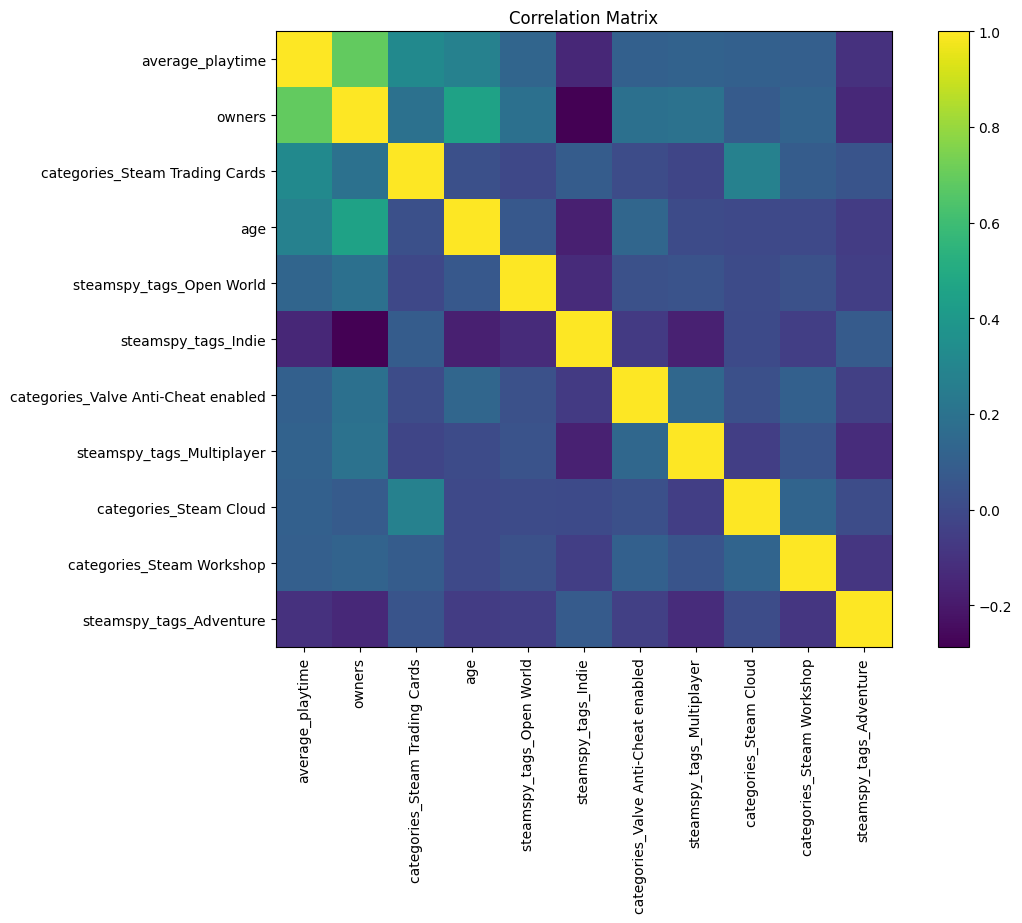

In [101]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns, rotation=90)
plt.yticks(ticks=np.arange(len(df.columns)), labels=df.columns)
plt.show()

# Random Forest
We first try the Random Forest Regression model as it has the highest r^2 value of 0.57 to see what variables we are going to get

In [87]:
# Assuming df is your DataFrame
df = tempDF

# Select the first column as the target variable
y = df.iloc[:, 0].values  # Target variable
y = y.ravel()  # Flatten the array if needed

# Select the rest of the columns as features, excluding the first column
X = df.drop(df.columns[0], axis=1).values  # Features

Length of Feature array: 11
Length of Importance array: 10


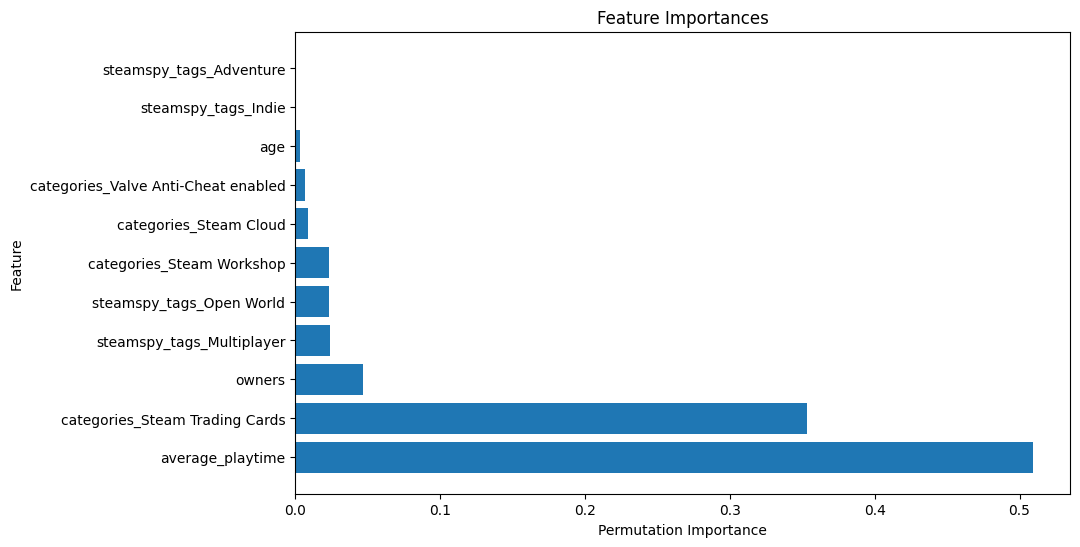

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder
 

from sklearn.model_selection import train_test_split

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)

# Fit the regressor with training data
regressor.fit(x_train, y_train)

# Evaluate the model using the test set
y_pred = regressor.predict(x_test)

# Extract feature importances
feature_importances = regressor.feature_importances_

# Get feature names from your DataFrame or dataset
feature_names = df.columns
print("Length of Feature array:", len(feature_names))
print("Length of Importance array:", len(feature_importances))
# Add a default importance value for the missing feature
default_importance = 0.0
feature_importances = np.append(feature_importances, default_importance)

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# Conclusion : Random Forest Regression Model
We ignore the average_playtime as that is what we are trying to predict. We can see that "categories_Steam Trading Cards" is the most dominant feature, followed by "owners" and "steamspy_tags_Multiplayer". "categories_Steam Trading Cards" has the highest permutation importance value of 0.3, indicating that it is a important feature in predicting average_playtime as the other variable have values lower than 0.1.

# Histogram-based Gradient Boosting Regression Tree
Next, we try Histogram-based Gradient Boosting Regression Tree, as it has the highest r^2 value of 0.57, same as the random forest regression

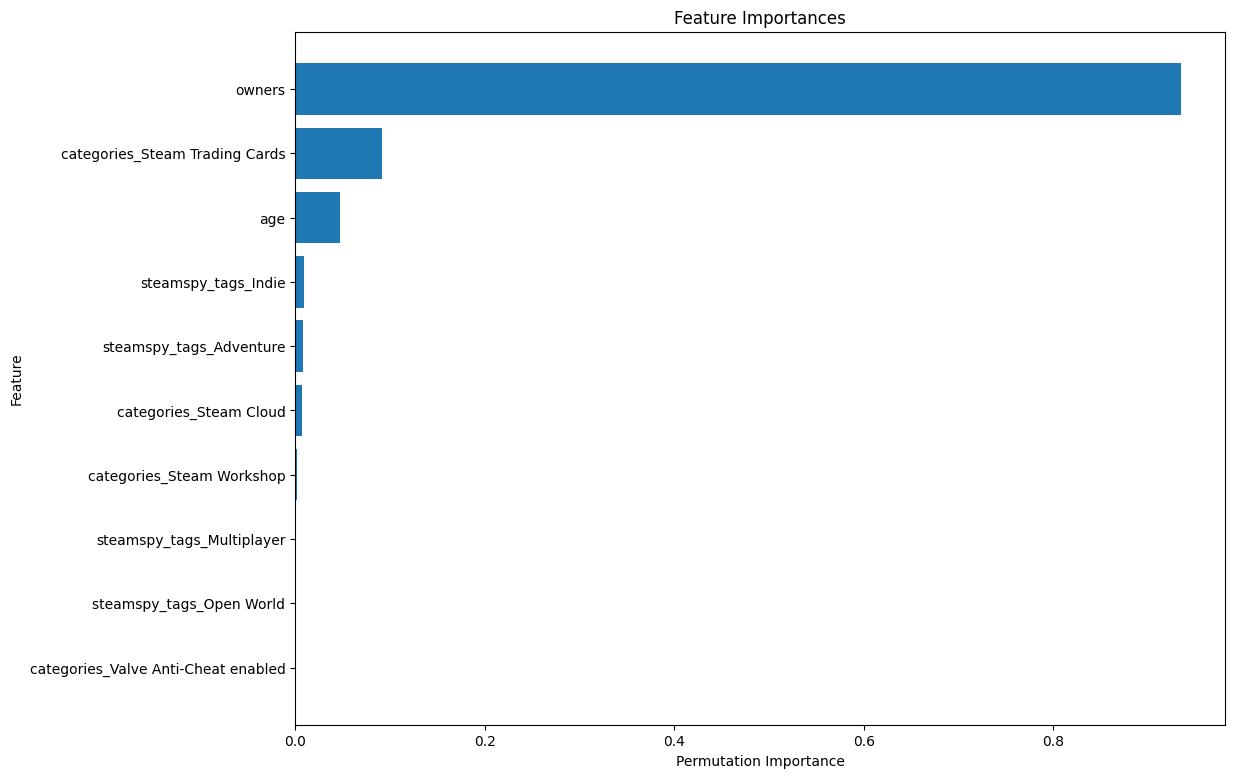

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance

df = tempDF
# Define your features and target variable
X = df.drop('average_playtime', axis=1)  # Replace 'target_variable' with your actual target variable name
y = df['average_playtime']  # Replace 'target_variable' with your actual target variable name

# Create the HistGradientBoostingRegressor model
hist_gbm = HistGradientBoostingRegressor(max_iter=100, max_leaf_nodes=31, random_state=42)

# Fit the model to the training data
hist_gbm.fit(X, y)

# Perform permutation importance
results = permutation_importance(hist_gbm, X, y, n_repeats=10, random_state=42)

# Organize and plot the results
importance_sorted_idx = results.importances_mean.argsort()

plt.barh(X.columns[importance_sorted_idx], results.importances_mean[importance_sorted_idx].T)
plt.xlabel("Permutation Importance")
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()



# Conclusion :Histogram-based Gradient Boosting Regression Tree
We can see that "owners" is the most dominant feature, followed by "categories_Steam Trading Cards" and "age". We can see that "owners" has a overwhelming high permutation importance of at least 0.8, compared with the other variables."categories_Steam Trading Cards" and "age" have a somewhat higher permutation importance compared to the other variables, indicating their importantness to predicting the response average_playtime in this model.

# XGBoost
Next we try XGBoost, a boosting regressor which is part of the descision tree family. We try this model as although the r^2 value was insignificant, it has a low p-value of 0.048, which means that the result is statistically significant, which is worth looking into to see if there is any diference in output compared to the previous 2 models.

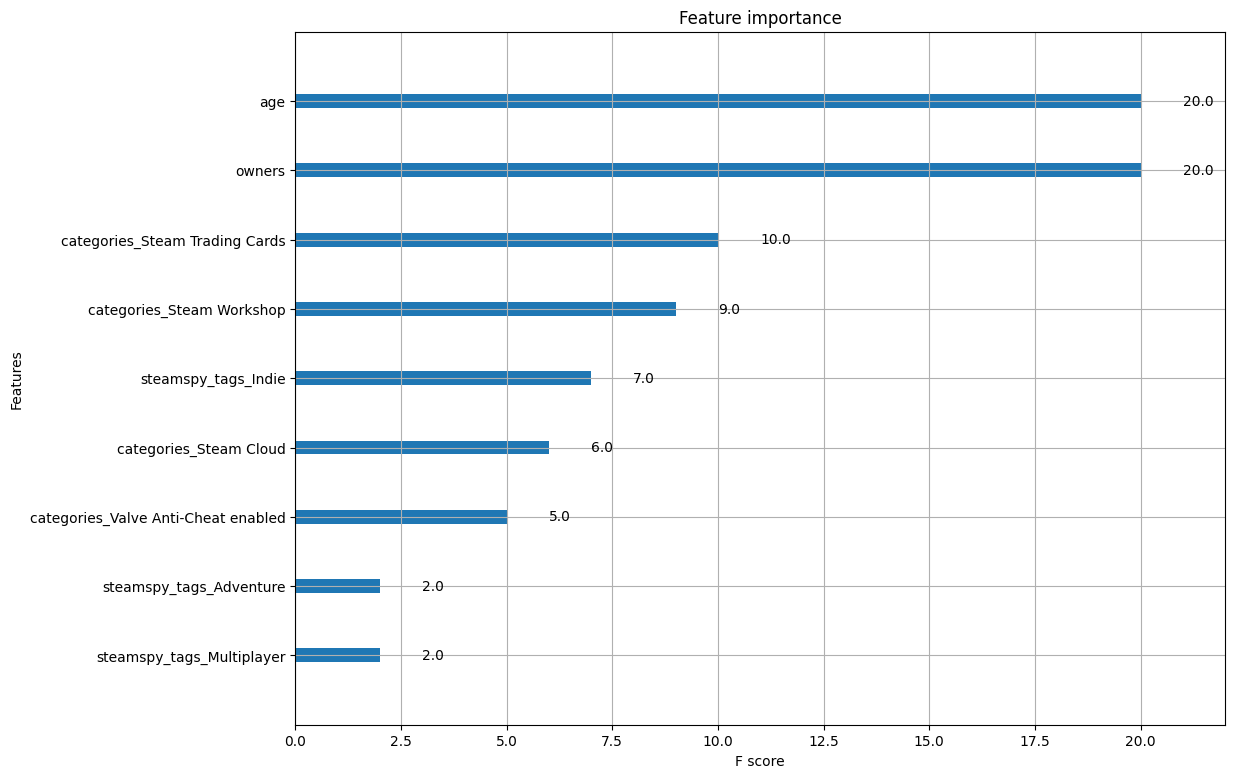

In [109]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

df = tempDF
# Define your features and target variable
X = df.drop('average_playtime', axis=1)  # Replace 'target_variable' with your actual target variable name
y = df['average_playtime']  # Replace 'target_variable' with your actual target variable name

# Create the XGBoost regressor object
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Fit the regressor to the training set
xg_reg.fit(X, y)

# Plot the feature importance
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [12, 9]
plt.show()

# Conclusion : XGBoost Regression Model
We can see that "age" and "owners" is the most dominant feature with a F score of 20, followed by "categories_Steam Trading Cards" and "categories_Steam Workshop". "age" and "owners" has the highest F score of 20, indicating that it is a important feature in predicting average_playtime as it is more frequently used in predicting the response average_playtime.

# AdaBoost Regressor

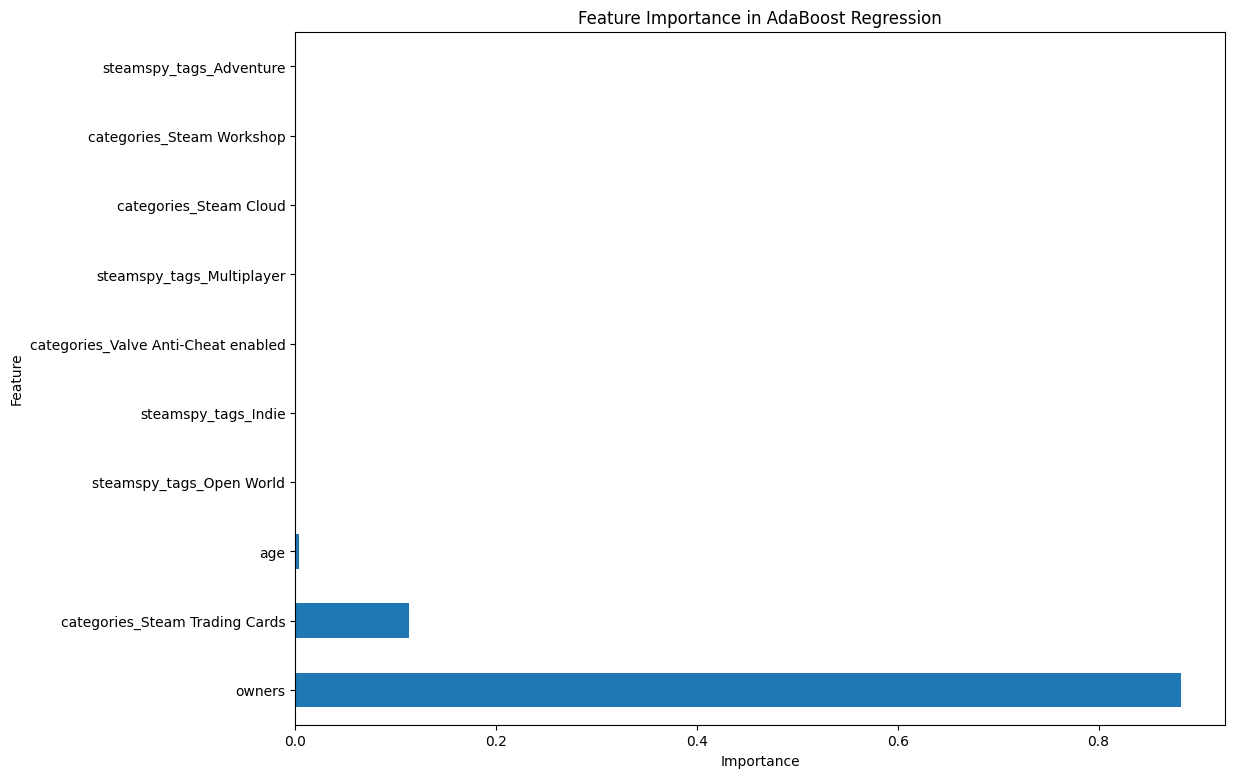

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor

df = tempDF
# Define your features and target variable
X = df.drop('average_playtime', axis=1)  # Replace 'target_variable' with your actual target variable name
y = df['average_playtime']  # Replace 'target_variable' with your actual target variable name

# Create the AdaBoost regressor object
ada_reg = AdaBoostRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training set
ada_reg.fit(X, y)

# Get feature importances
feature_importances = ada_reg.feature_importances_

# Create a pandas Series with feature importances indexed by column names
feat_importances = pd.Series(feature_importances, index=X.columns)

# Plot the feature importances
feat_importances.plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in AdaBoost Regression')
plt.show()

# Conclusion : AdaBoost Regressor
We can see that "owners" is the most dominant feature, followed by "categories_Steam Trading Cards" and "age". We can see that "owners" has a overwhelming high permutation importance of at least 0.8, compared with the other variables. Only "categories_Steam Trading Cards" have a somewhat higher permutation importance compared to the other variables, indicating their importantness to predicting the response average_playtime in this model.

# what makes a video game (on steam) popular?

# Conclusion
We have found out that there are 5 factors that affects average playtime. These 5 factors are Owners, Workshop, Multiplayer, Trading Cards and Age. Owners refers to how many people have owned the game based on how long the game has been released. Workshop refers to whether the game is allowed and able to be modded (modifiable) from the community. Multiplayer refers to whether a game can be played as a multiplayer game. Trading card refers to whether the game gives you trading cards after you play the game for a certain number of hours. Age refers to how long the game has been out for since 1st January 2024. 

From this project, we have learnt that “Owners” has the strongest correlation (4 out of 4) while the others have a slightly weaker correlation (2 out of 4) between the 4 models. This shows that the higher the total number of people who owns the game, it is very likely that the game will have a higher average playtime which makes it popular. The other 4 factors are also equal factors that can affect the popularity of the games based on the average playtime.

We were surprised as gamers prefer games that have trading cards and have a workshop. This shows that gamers value getting rewards when they play a game as trading cards are being given after a player plays a game for a set amount of time. Gamers also value being able to modify and change the game as they are able to add to the replayability of the game and thus increase the average playtime of the game. 
Thus, we would recommend businesses and investors to work on new games that are able to satisfy these 3 factors, the game has to be a multiplayer game, the game has to provide or have a community workshop and also have trading cards. These will ensure that the new game will have all the popular factors which attracts gamers. This will exponentially increase the chance on making the next popular game.